# More classifiers

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
iris=datasets.load_iris()

In [59]:
x=iris.data
y=iris.target

## SVM

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [29]:
c_values=np.arange(-3,3,0.1)
cvals=[10**(i) for i in c_values]

accuracy=[]
accuracy_poly=[]
accuracy_rbf=[]
for cval in cvals:
    svm = SVC(kernel='linear', C=cval, random_state=1)
    score=np.mean(cross_val_score(svm,x,y,cv=5)) #5 fold validation
    accuracy.append(score)
    svm2 = SVC(kernel='poly', C=cval, random_state=1)
    score2=np.mean(cross_val_score(svm2,x,y,cv=5)) #5 fold validation
    accuracy_poly.append(score2)
    svm3 = SVC(kernel='rbf', C=cval, random_state=1)
    score3=np.mean(cross_val_score(svm3,x,y,cv=5)) #5 fold validation
    accuracy_rbf.append(score3)

Populating the interactive namespace from numpy and matplotlib


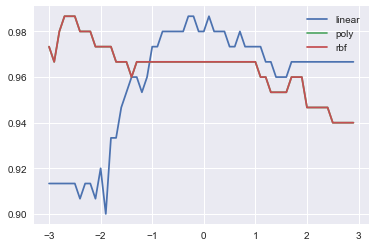

In [30]:
%pylab inline
plt.plot(c_values,accuracy,label="linear")
plt.plot(c_values,accuracy_poly,label="poly")
plt.plot(c_values,accuracy_poly,label="rbf")
plt.legend()

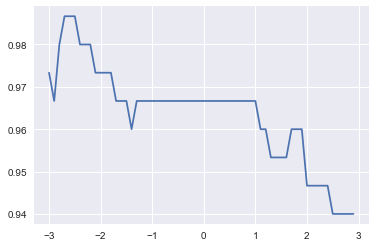

In [31]:
plt.plot(c_values,accuracy_poly,label="poly")

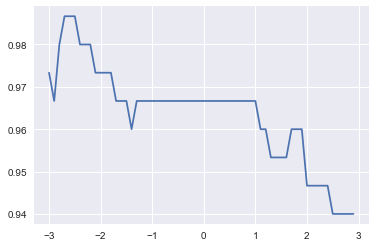

In [32]:
plt.plot(c_values,accuracy_poly,label="rbf")

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [41]:
c_values=np.arange(-3,3,0.1)
cvals=[10**(i) for i in c_values]

accuracy=[]
accuracy_poly=[]
accuracy_rbf=[]
train_linear=[]
train_poly=[]
for cval in cvals:
    svm = SVC(kernel='linear', C=cval, random_state=1)
    svm.fit(x_train,y_train)
    score=svm.score(x_test,y_test)
    accuracy.append(score)
    train_score=svm.score(x_train,y_train)
    train_linear.append(train_score)
    svm2 = SVC(kernel='poly', C=cval, random_state=1)
    svm2.fit(x_train,y_train)
    score2=svm2.score(x_test,y_test)
    accuracy_poly.append(score2)
    train_score2=svm2.score(x_train,y_train)
    train_poly.append(train_score2)
    svm3 = SVC(kernel='rbf', C=cval, random_state=1)
    svm3.fit(x_train,y_train)
    score3=svm3.score(x_test,y_test)
    accuracy_rbf.append(score3)

Populating the interactive namespace from numpy and matplotlib


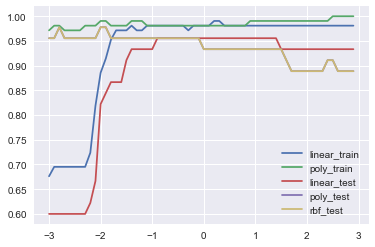

In [42]:
%pylab inline
plt.plot(c_values,train_linear,label="linear_train")
plt.plot(c_values,train_poly,label="poly_train")
plt.plot(c_values,accuracy,label="linear_test")
plt.plot(c_values,accuracy_poly,label="poly_test")
plt.plot(c_values,accuracy_poly,label="rbf_test")
plt.legend()

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

### Hyper-parameter tuning for random forest:

n_estimators: @Falcon is wrong, in general the more trees the less likely the algorithm is to overfit. So try increasing this. 
    The lower this number, the closer the model is to a decision tree, with a restricted feature set.
    
max_features: try reducing this number (try 30-50% of the number of features). This determines how many features each tree is randomly assigned. 
    The smaller, the less likely to overfit, but too small will start to introduce under fitting.
    
max_depth: Experiment with this. This will reduce the complexity of the learned models, lowering over fitting risk. Try starting small, say 5-10, and increasing you get the best result.
    
min_samples_leaf: Try setting this to values greater than one. This has a similar effect to the max_depth parameter, it means the branch will stop splitting once the leaves have that number of samples each.

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
# Number of trees in random forest
n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [55]:
from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [60]:
#Random Search Training
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=30 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=30 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=30 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.4s


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1000, min_samples_split=2, max_features=auto, max_depth=50, total=   3.8s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=90 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1000, min_samples_split=2, max_features=auto, max_depth=50, total=   3.8s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=10, max_features=auto, max_depth=70, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=90, total=   3.1s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=Fals

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=110, total=   2.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=50, total=   3.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=50, total=   4.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1800, min_samples_split=2, max_features=auto, max_depth=20, total=   7.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30 
[CV]  bootstrap=

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [61]:
#the best hyper-parameters after fitting the random search
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1200}

In [63]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [8, 9, 10, 11,12],
    'max_features': [2,3,4],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [1100, 1150, 1200, 1250,1300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [68]:
#grid_search.fit(x,y)
#the grid_search is taking forever to finish
#so I stopped it

#but the idea is to run through the sets of parameters and then get the best parameters from the run
#
#grid_search.best_params_